**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: DANIEL EDGARDO GARCIA BONILLA
*   MATRÍCULA: A1797180

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
DIR = r"C:\Users\dgarc\OneDrive\Documentos\U\Ciencia_de_Datos\EDA"
os.chdir(DIR)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 5))

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

In [5]:
df.isna().sum()/325821*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.274691
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.956353
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
person_age_skew= df.loc[:, "person_age"].skew()
loan_int_rate_skew= df.loc[:, "loan_int_rate"].skew()
person_age_kurt= df.loc[:,"person_age"].kurt()
loan_int_rate_kurt= df.loc[:,"loan_int_rate"].kurt()

In [8]:
pd.DataFrame({"mode":[df['person_age'].mode()[0], df['loan_int_rate'].mode()[0]],
             "mean":[df['person_age'].mean(), df['loan_int_rate'].mean()],
             "median": [df['person_age'].median(), df['loan_int_rate'].median()],
             "skewness":[person_age_skew,loan_int_rate_skew],
             "kurtosis":[person_age_kurt, loan_int_rate_kurt]},index=["person_age","loan_int_rate"])

,mode,mean,median,skewness,kurtosis
person_age,23.00,27.734600,26.00,2.581393,18.560825
loan_int_rate,7.51,11.011695,10.99,0.208550,-0.671609


**person_age**: Tiene un sesgo positivo. La kurtosis es mayor que 3, por lo tanto se considera LeptoKurtica,  lo que indica que tiene un pico más agudo y colas más pesadas que una distribución normal. Esto sugiere una mayor probabilidad de valores extremos. 

**loan_int_rate**: Tiene un sesgo positivo, cercano a cero. La kurtosis es negativa, por lo que se clasifica como kurtosis platikurtica, lo que indica que la distribución tiene un pico más plano y colas más cortas que una distribución normal.

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

<Figure size 1000x500 with 0 Axes>

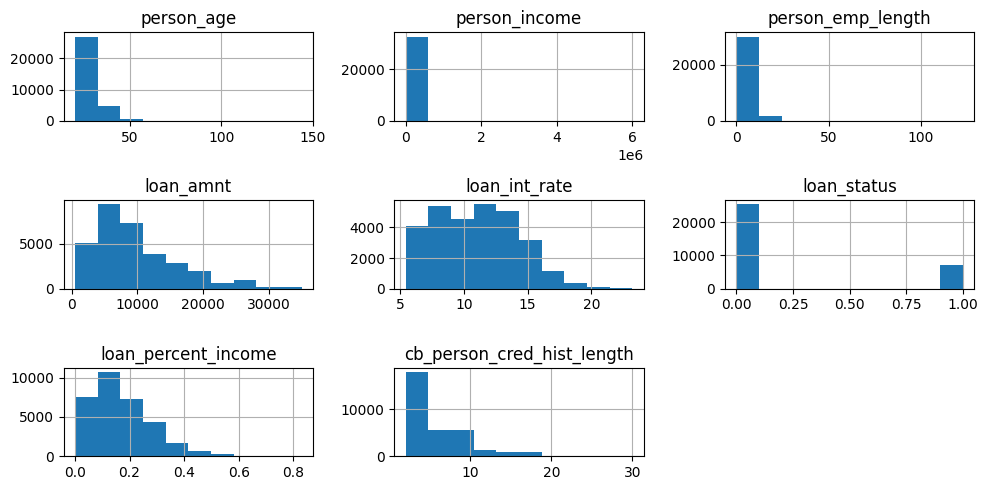

In [9]:
figure= plt.figure()
df.hist()
plt.tight_layout()
plt.show()

**Análisis de person_age y loan_int_rate**

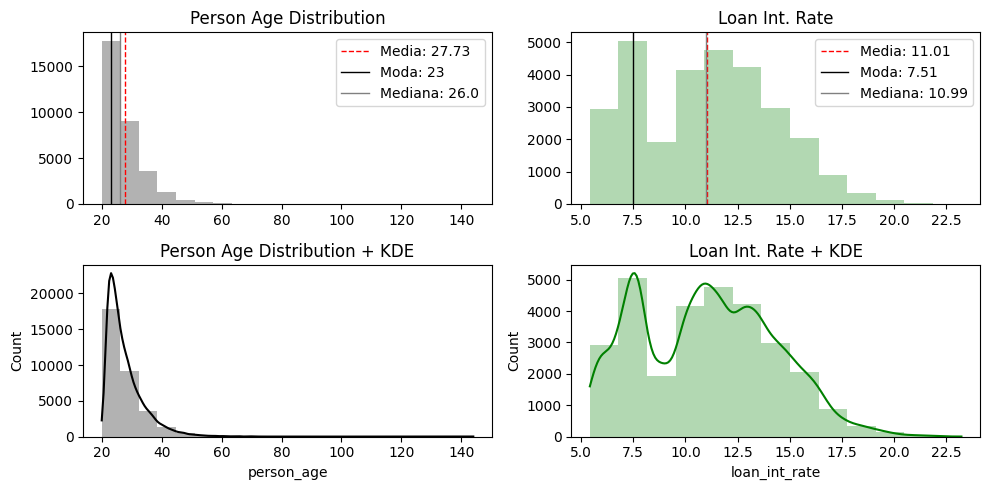

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3= fig.add_subplot(2, 2, 3)
ax4= fig.add_subplot(2, 2, 4)

ax1.hist(df['person_age'], bins=20, color="black", alpha=0.3)
ax1.axvline(df['person_age'].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Media: {round(df['person_age'].mean(),2)}")
ax1.axvline(df['person_age'].mode()[0], color='black', linewidth=1, label=f"Moda: {df['person_age'].mode()[0]}")
ax1.axvline(df['person_age'].median(), color='gray', linewidth=1, label=f"Mediana: {df['person_age'].median()}")
ax1.set_title("Person Age Distribution")
ax1.legend()

ax2.hist(df['loan_int_rate'], bins= 13, color="green", alpha= 0.3)
ax2.axvline(x=df['loan_int_rate'].mean(),color= "red" ,linestyle= "--", linewidth=1, label=f"Media: {round(df['loan_int_rate'].mean(),2)}")
ax2.axvline(df['loan_int_rate'].mode()[0], color='black', linewidth=1, label=f"Moda: {df['loan_int_rate'].mode()[0]}")
ax2.axvline(df['loan_int_rate'].median(), color='gray', linewidth=1, label=f"Mediana: {df['loan_int_rate'].median()}")
ax2.set_title("Loan Int. Rate")
ax2.legend()

sns.histplot(df['person_age'], bins=20, kde=True, color="black", linewidth=0, alpha= 0.3, ax=ax3)
ax3.set_title("Person Age Distribution + KDE")

sns.histplot(df['loan_int_rate'], bins=13, kde=True, color="green",linewidth=0, alpha= 0.3, ax=ax4)
ax4.set_title("Loan Int. Rate + KDE")

plt.tight_layout()
plt.show()

La conclusión obtenida con los parámetros iniciales coincide con el comportamiento que se muestra en los gráficos. Junto al cálculo inicial que se realizó, es de suma importancia crear las visualizaciónes para obtener una comprensión más precisa del comportamiento de los datos.

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

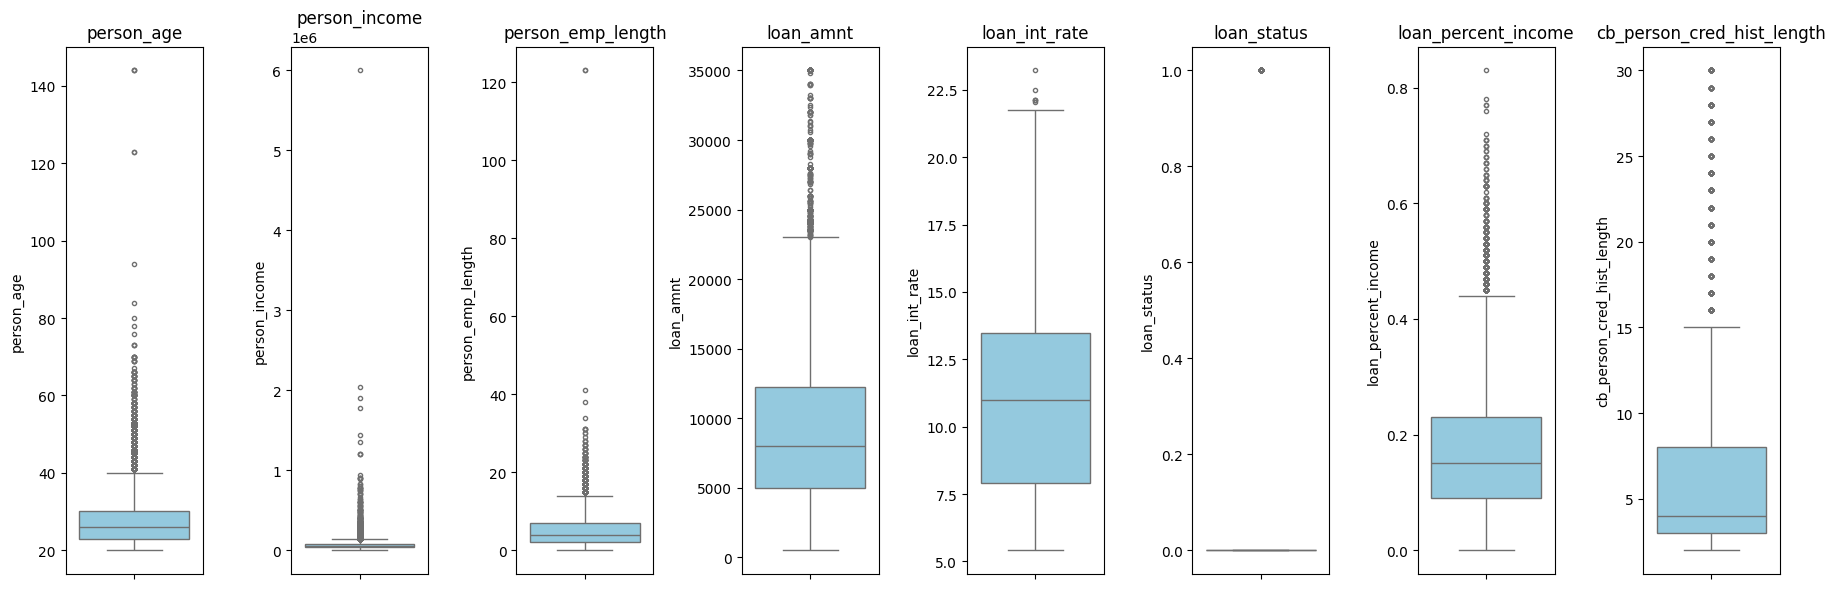

In [11]:
# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include="number")

fig, axes = plt.subplots(ncols=len(df_numeric.columns), figsize= (18,6))
# Generar un boxplot por cada columna
for i, col in enumerate(df_numeric.columns):
    sns.boxplot(data=df[col], ax=axes[i], color="skyblue", flierprops={"marker": "."})
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")

# Ajustar el layout para mejor visualización
plt.tight_layout()
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [12]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [13]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [14]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [15]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [16]:
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [17]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

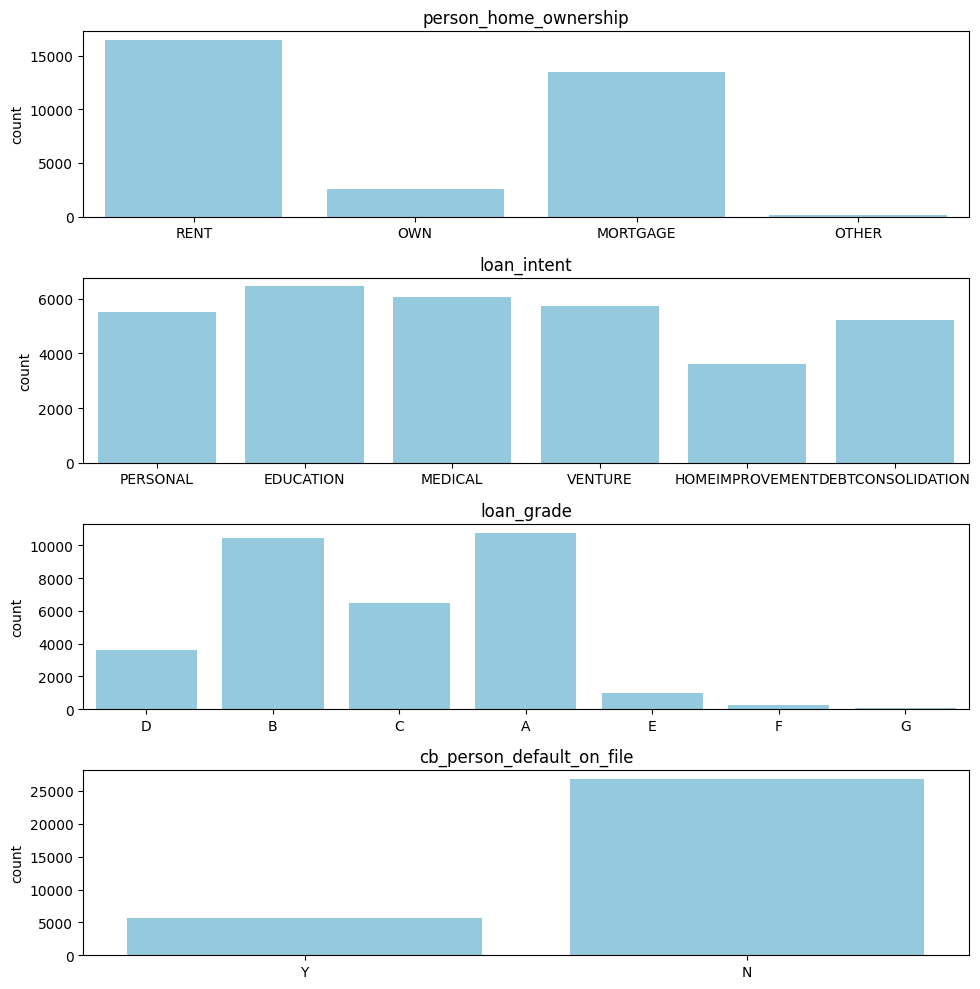

In [18]:
# Filtrar solo columnas tipo object
df_object = df.select_dtypes(include="object")

fig, axes = plt.subplots(nrows=len(df_object.columns), figsize= (10,10))
# Generar un boxplot por cada columna
for i, col in enumerate(df_object.columns):
    sns.countplot(x=col, data=df,ax=axes[i], color="skyblue")
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")

# Ajustar el layout para mejor visualización

plt.tight_layout()
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

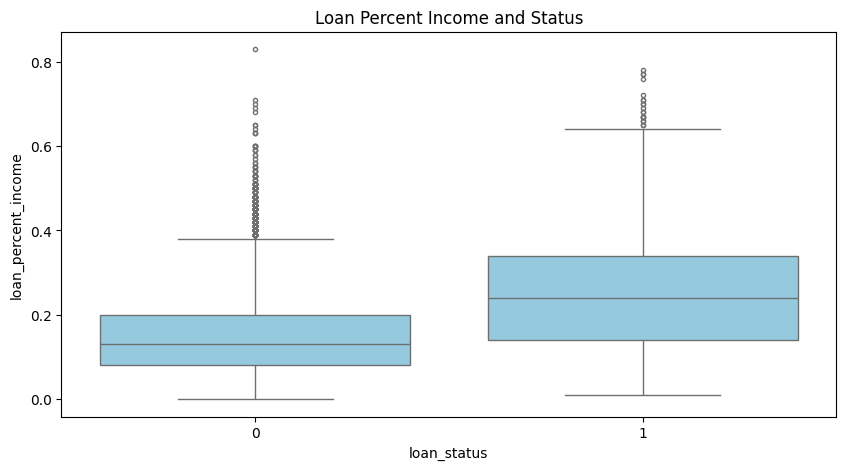

In [22]:
figure= plt.figure()
sns.boxplot(data=df, x= "loan_status",y="loan_percent_income", color="skyblue", flierprops={"marker": "."} )
plt.title("Loan Percent Income and Status")
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

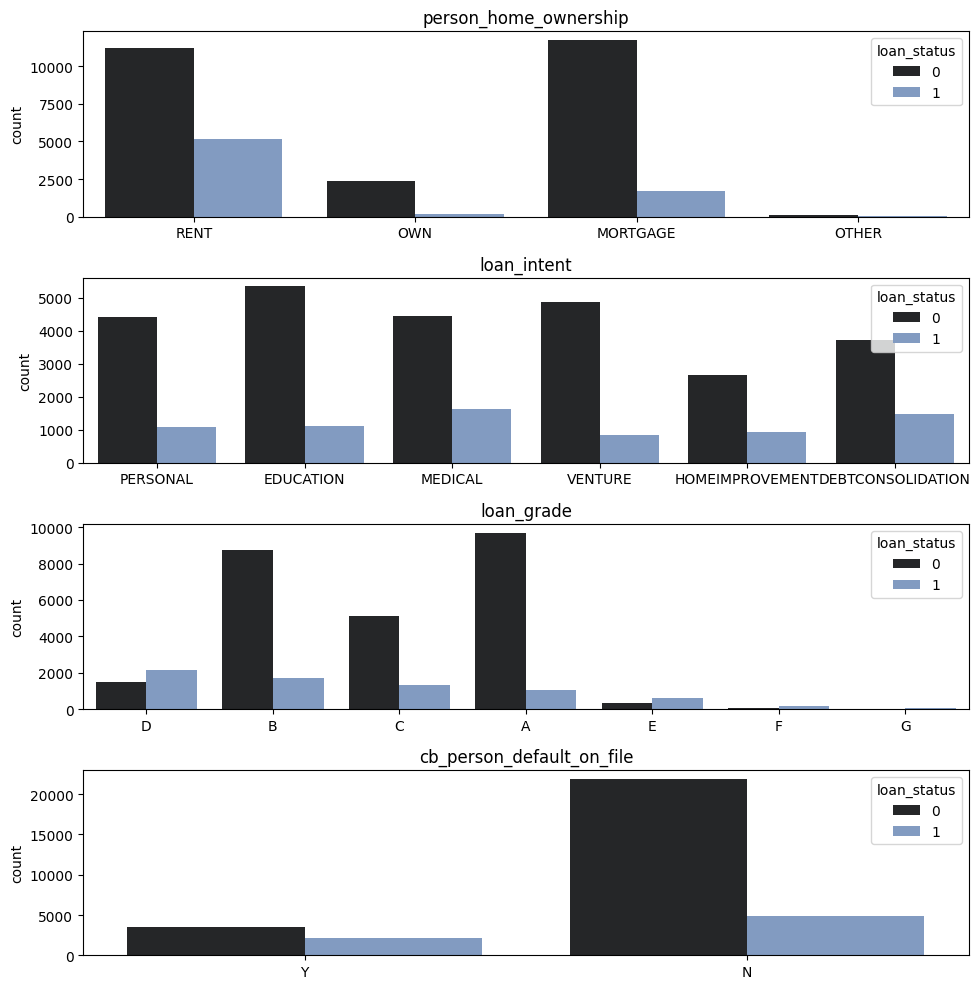

In [83]:
# Filtrar solo columnas tipo object
df_object = df.select_dtypes(include="object")

fig, axes = plt.subplots(nrows=len(df_object.columns), figsize= (10,10))
# Generar un boxplot por cada columna
for i, col in enumerate(df_object.columns):
    sns.countplot(x=col, data=df,ax=axes[i], color="skyblue", hue= "loan_status", palette=sns.dark_palette("#79C", 2) )
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("")

# Ajustar el layout para mejor visualización

plt.tight_layout()
plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

In [62]:
correlation_matrix= df_numeric.corr()

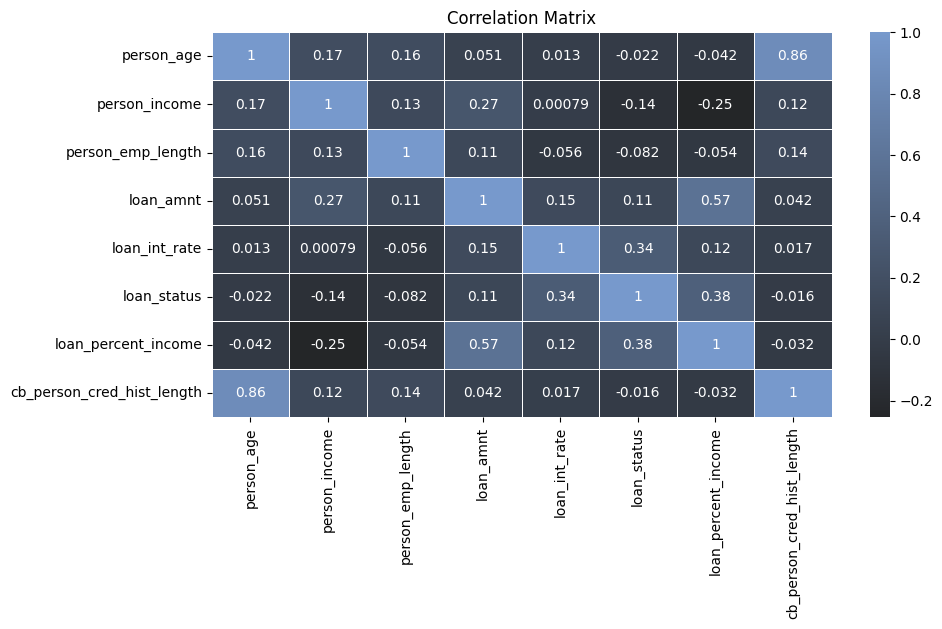

In [84]:
figure= plt.figure()
sns.heatmap(data=correlation_matrix, annot=True, linewidth=0.5, cmap=sns.dark_palette("#79C", as_cmap=True))
plt.title("Correlation Matrix")
plt.show()

La varible que tiene una correlación más fuerte con loan_status es loan_percent_income con una correlación de 38%.